<a href="https://colab.research.google.com/github/Anagha-dsa/Data.science/blob/main/Internship_Anagha_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internship : **Customer Purchase Behavior Analysis and Loyalty Prediction**
     

## **Objective:**

Given a dataset containing customer purchase history, satisfaction scores, and loyalty scores, the objective is to develop a predictive model to accurately forecast future customer satisfaction or loyalty levels.

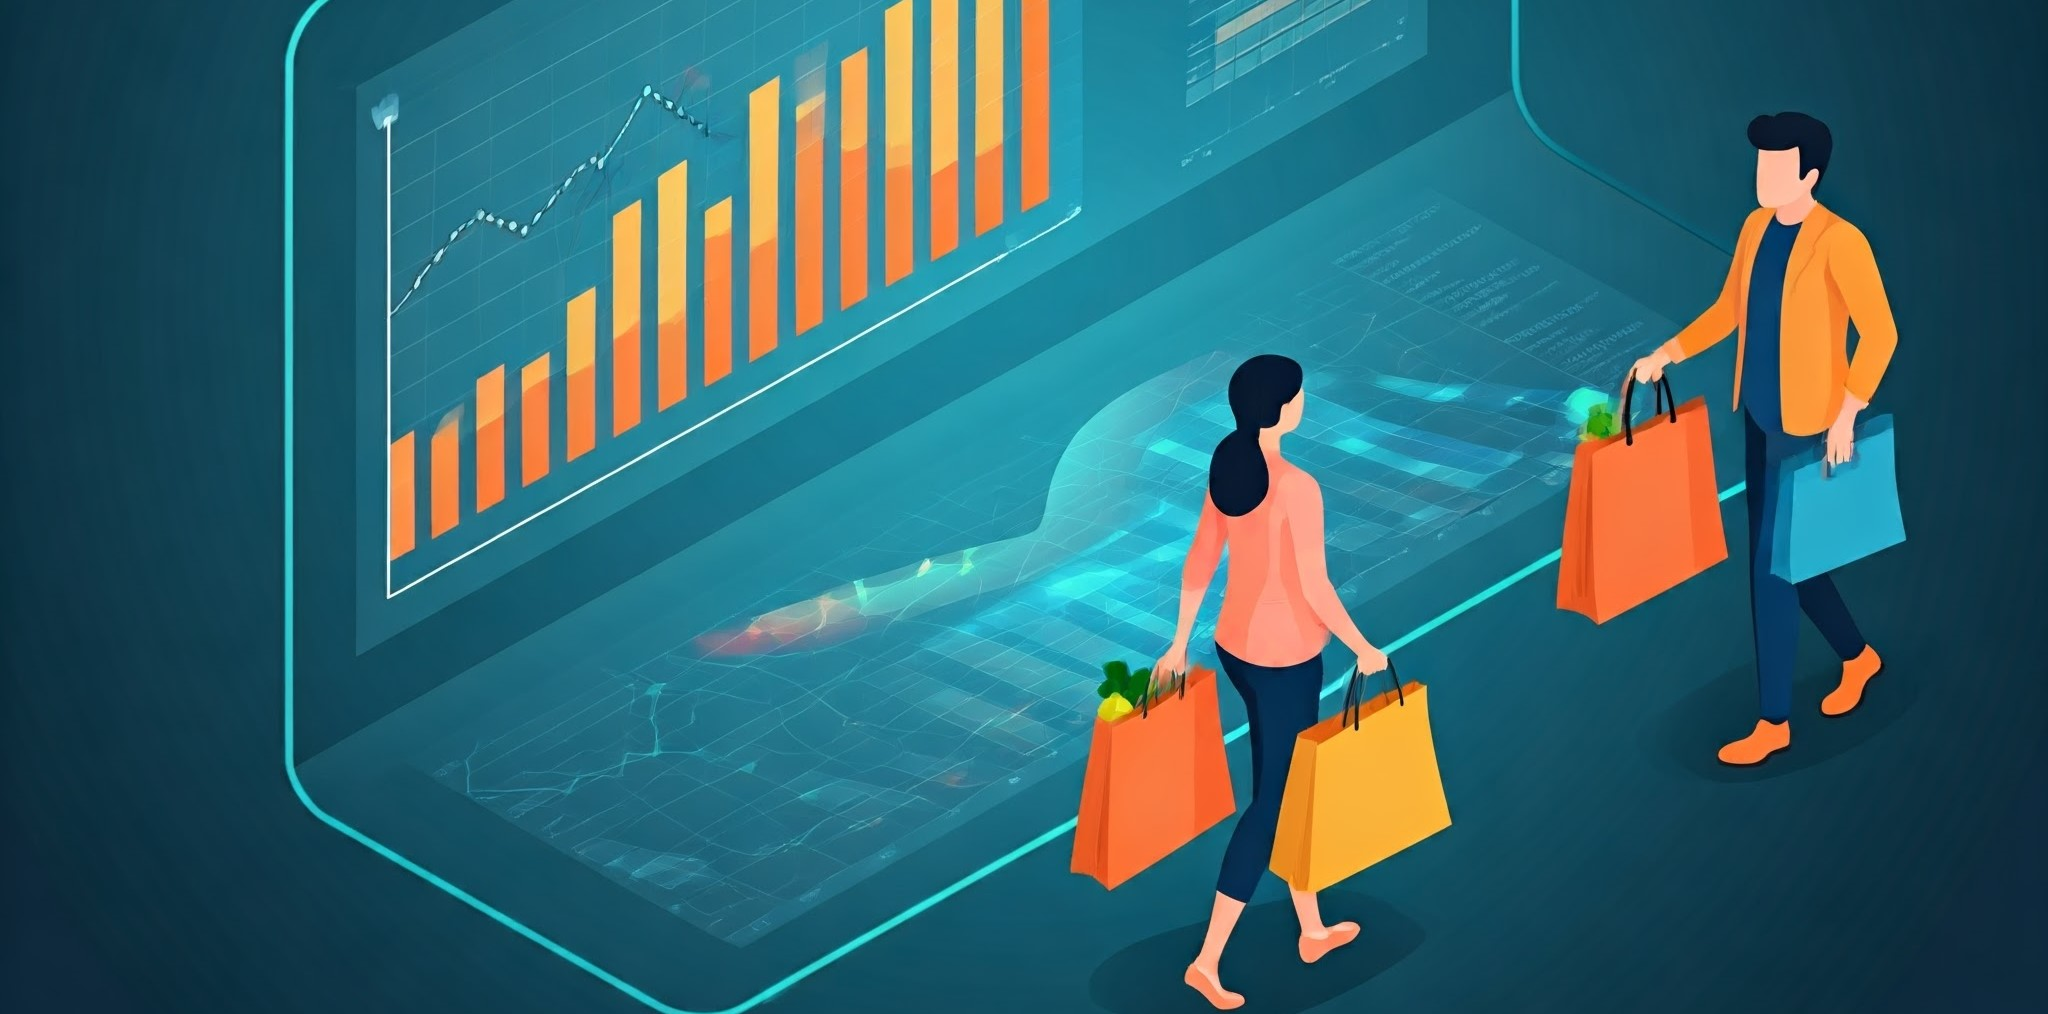

# **Dataset Description:**

 The dataset includes fields such as:

 ● **Age**: Age of the customer

 ● **ItemsPurchased**: Number of items purchased in a single transaction

 ● **Total Spen**t: Total amount spent on the transaction

 ● **Discount(%)**: Percentage discount on the purchase

 ● **Satisfaction Score**: Self-reported customer satisfaction score

 ● **Warranty Extension**: Whether the customer opted for warranty extension

 ● **Gender**: Gender of the customer

 ● **Region**: Customer's region

 ● **Product Category**: Category of the purchased product

 ● **Payment Method**: Payment method used(e.g.,UPI,Cash)

 ● **Revenue**: Total revenue from the customer

 ● **Store Rating**: Rating given by the customer to the store

 ● **Loyalty Score**: Customer's loyalty score

 ● **Membership Status**: Whether the customer is a member

 ● **Preferred Visit Time**: Preferred time of visit


##**1. Data Loading**

In [2]:
# Importing LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOADING THE DATASET

df= pd.read_csv('/content/Electronic.csv')

In [4]:
# Displays first 5 rows
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


In [5]:
# Function to convert scores to one decimal point
def convert_to_one_decimal(score):
    return round(score, 1)

# Apply the function to the relevant columns
df['Store Rating'] = df['Store Rating'].apply(convert_to_one_decimal)
df['Satisfaction Score'] = df['Satisfaction Score'].apply(convert_to_one_decimal)
df['Loyalty Score'] = df['Loyalty Score'].apply(convert_to_one_decimal)

# Display the updated DataFrame (optional)
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.0,1,Male,South,Accessories,UPI,149.252145,3.7,3.6,1.0,Evening
1,69,10,420.142612,7.985739,3.8,1,Female,South,Accessories,Cash,1485.524222,3.6,25.8,1.0,Evening
2,46,4,127.742817,37.225718,1.8,1,Male,East,Laptop,Credit Card,85.550131,3.9,7.0,1.0,Morning
3,32,9,417.722683,8.227732,1.9,0,Female,East,Tablet,UPI,824.118724,3.9,7.6,1.0,Afternoon
4,60,13,608.031366,5.000000,3.9,0,Female,South,Tablet,UPI,2463.590392,3.8,29.5,0.0,Morning


## **2. Understanding the Data**

In [6]:
# CHECK FOR MISSING VALUES

df.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


Features with misssing values and their respective counts are :


*   Gender	             2
*   Payment Method    	 4
*   Store Rating	       3
*   Membership Status	   6
*   Preferred Visit Time 8




In [7]:
# check for duplicate data
df.duplicated().sum()

0

In [8]:
# Print suummary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

* 5000 rows
* 15 columns





In [9]:
# Understands the data types

df.dtypes

,0
Age,int64
Items Purchased,int64
Total Spent,float64
Discount (%),float64
Satisfaction Score,float64
Warranty Extension,int64
Gender,object
Region,object
Product Category,object
Payment Method,object


        dtypes:
* float64(7)
* int64(3)
* object(5)

## **3. Exploratory DataAnalysis (EDA):**

## **Univariate Analysis**

In [10]:
# numeriacal columns and categorical columns

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
categorical_cols

Numerical Columns:
['Age', 'Items Purchased', 'Total Spent', 'Discount (%)', 'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating', 'Loyalty Score', 'Membership Status']

Categorical Columns:


['Gender',
 'Region',
 'Product Category',
 'Payment Method',
 'Preferred Visit Time']

### **Univariate analysis of Age**




count    5000.000000
mean       43.584600
std        14.919094
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64
Skewness of Age: -0.012230366929141884


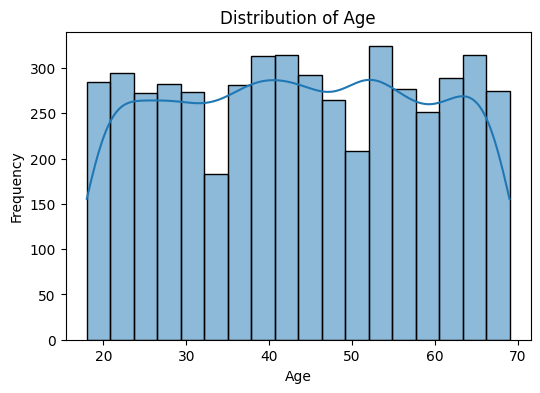

In [11]:
# Descriptive statistics
print(df['Age'].describe())

# Skewness
skewness_age = df['Age'].skew()
print(f"Skewness of Age: {skewness_age}")

# Histogram and KDE plot
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Key points:**

* The distribution of age appears to be normally distributed, with a slight negative skew. This suggests that the majority of individuals in the dataset are of a similar age.
* The majority of individuals in the dataset are between 30 and 55 years old.
* There is a relatively even distribution of ages within this range.
The distribution is centered around the mean age of 43.58.

### **Univariate Analysis of Items Purchased**

count    5000.000000
mean        7.536600
std         4.014858
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        14.000000
Name: Items Purchased, dtype: float64
Skewness of Items Purchased: -0.018387067084722975


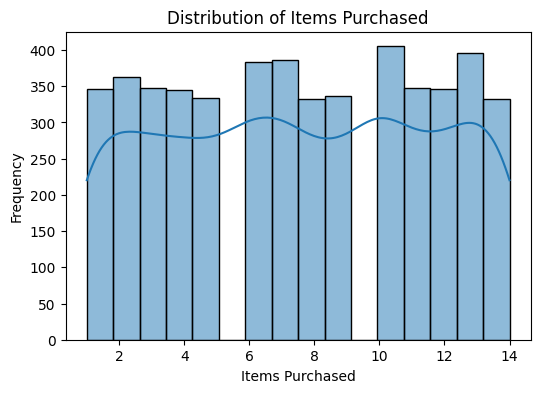

In [12]:
# Descriptive statistics
print(df['Items Purchased'].describe())

# Skewness
skewness_items_purchased = df['Items Purchased'].skew()
print(f"Skewness of Items Purchased: {skewness_items_purchased}")

# Histogram and KDE plot
plt.figure(figsize=(6, 4))
sns.histplot(df['Items Purchased'], kde=True)
plt.title('Distribution of Items Purchased')
plt.xlabel('Items Purchased')
plt.ylabel('Frequency')
plt.show()


**Interpretation**
* The distribution of items purchased is roughly normal with a slight negative skew.
* Most transactions involve 4-11 items, centered around 7.54 items. The standard deviation is 4.01, indicating a relatively wide spread.




### **Univariate analysis of total spent**

count    5000.000000
mean      243.721837
std       154.949018
min        15.105730
25%       119.130074
50%       221.514206
75%       346.173367
max       699.611576
Name: Total Spent, dtype: float64
Skewness of Total Spent: 0.5975284999045414


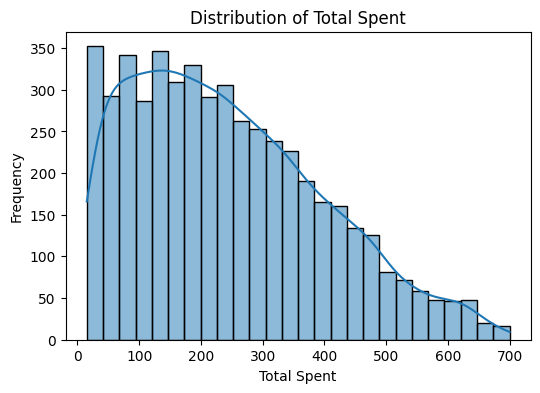

In [13]:
# Descriptive statistics for 'Total Spent'
print(df['Total Spent'].describe())

# Skewness of 'Total Spent'
skewness_total_spent = df['Total Spent'].skew()
print(f"Skewness of Total Spent: {skewness_total_spent}")

# Histogram and KDE plot for 'Total Spent'
plt.figure(figsize=(6, 4))
sns.histplot(df['Total Spent'], kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()


**Interpretation**

* The distribution of total spent is right-skewed, with a majority of transactions concentrated in the lower spending range.
* The long tail indicates the presence of a few transactions with significantly higher spending amounts.
*  This suggests that the average spending amount is likely influenced by these outliers, making the median a more representative measure of central tendency in this case

### **Univariate analysis of discount**

count    5000.000000
mean       26.622330
std        13.586725
min         5.000000
25%        15.382663
50%        27.848579
75%        38.086993
max        48.489427
Name: Discount (%), dtype: float64
Skewness of Discount: -0.17984239343164707


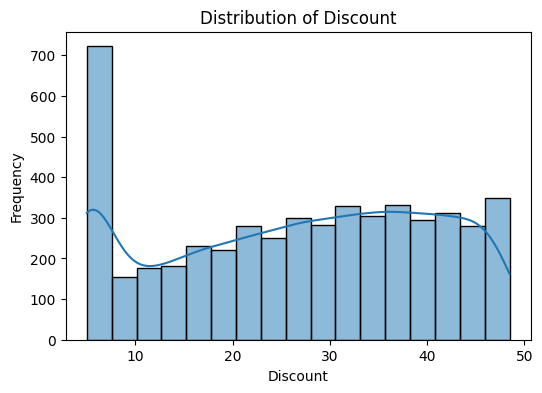

In [14]:
# Descriptive statistics for 'Discount'
print(df['Discount (%)'].describe())

# Skewness of 'Discount'
skewness_discount = df['Discount (%)'].skew()
print(f"Skewness of Discount: {skewness_discount}")

# Histogram and KDE plot for 'Discount'
plt.figure(figsize=(6, 4))
sns.histplot(df['Discount (%)'], kde=True)
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


**Key Observations:**

* The distribution of discounts appears to be normally distributed, with a very slight negative skew.
* This suggests that the majority of discounts offered are of a similar magnitude.

### **Univariate analysis of Satisfaction Score**

count    5000.000000
mean        2.650520
std         1.533834
min         1.000000
25%         1.000000
50%         2.300000
75%         4.100000
max         5.000000
Name: Satisfaction Score, dtype: float64
Skewness of Satisfaction Score: 0.35085482541582613


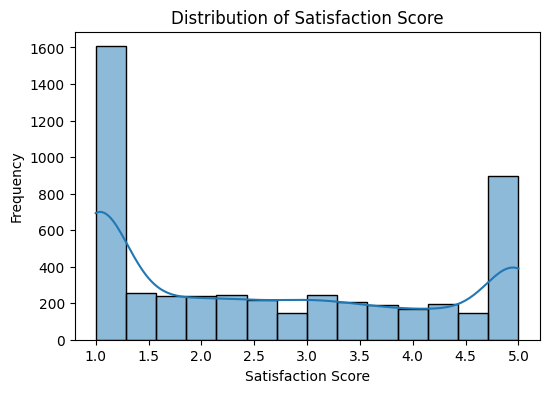

In [15]:
# Descriptive statistics for 'Satisfaction Score'
print(df['Satisfaction Score'].describe())

# Skewness of 'Satisfaction Score'
skewness_satisfaction_score = df['Satisfaction Score'].skew()
print(f"Skewness of Satisfaction Score: {skewness_satisfaction_score}")

# Histogram and KDE plot for 'Satisfaction Score'
plt.figure(figsize=(6, 4))
sns.histplot(df['Satisfaction Score'], kde=True)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

This distribution suggests that while there are a significant number of customers with lower satisfaction scores, there is also a considerable portion of customers who are highly satisfied with the product or service.

**Key Observations:**

* Mean: The average satisfaction score is 2.65, indicating a moderate level of satisfaction overall.
* Standard Deviation: The scores are spread out by an average of 1.53 units from the mean.
* Range: The scores range from 1 (lowest) to 5 (highest).
* Skewness: The skewness of 0.35 indicates a moderate positive skew, as mentioned earlier.


### **Univariate analysis of Warranty Extension**

count    5000.000000
mean        0.220400
std         0.414558
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Warranty Extension, dtype: float64
Skewness of Warranty Extension: 1.349446810515997


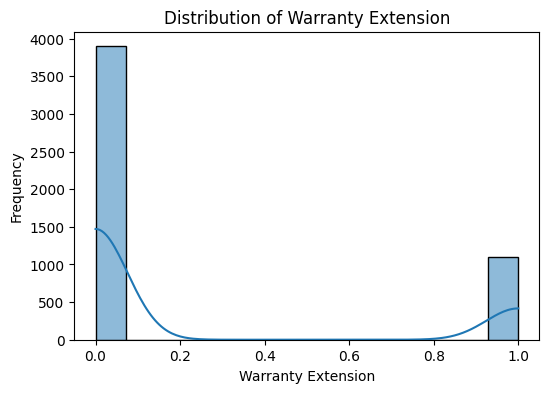

In [16]:
# prompt:   with skewness, describe Warranty Extension

# Descriptive statistics for 'Warranty Extension'
print(df['Warranty Extension'].describe())

# Skewness of 'Warranty Extension'
skewness_warranty_extension = df['Warranty Extension'].skew()
print(f"Skewness of Warranty Extension: {skewness_warranty_extension}")

# Histogram and KDE plot for 'Warranty Extension'
plt.figure(figsize=(6, 4))
sns.histplot(df['Warranty Extension'], kde=True)
plt.title('Distribution of Warranty Extension')
plt.xlabel('Warranty Extension')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

The distribution of warranty extensions is positively skewed, with a long tail towards the higher end. This indicates that most customers do not purchase warranty extensions, while a smaller portion does.

**Key Observations:**

The mean warranty extension rate is 0.22, and the standard deviation is 0.41.
The skewness of 1.35 confirms the strong positive skew.

### **Univariate analysis of Revenue**

count    5000.000000
mean      717.998214
std       776.789137
min      -201.427094
25%       164.697614
50%       380.548500
75%      1047.426498
max      3523.469177
Name: Revenue, dtype: float64
Skewness of Revenue: 1.3942842932146584


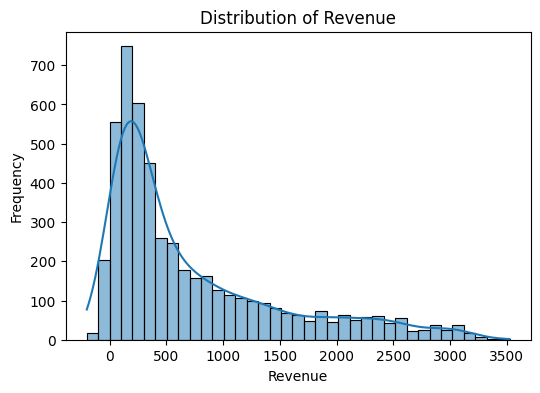

In [17]:
# Descriptive statistics for 'Revenue'
print(df['Revenue'].describe())

# Skewness of 'Revenue'
skewness_revenue = df['Revenue'].skew()
print(f"Skewness of Revenue: {skewness_revenue}")

# Histogram and KDE plot for 'Revenue'
plt.figure(figsize=(6, 4))
sns.histplot(df['Revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

* The distribution of revenue is highly right-skewed, with a mean of 718 and a standard deviation of 777.
* The majority of transactions have lower revenue values, while a smaller number of transactions generate significantly higher revenue.
* The skewness value of 1.39 confirms this strong right-skewness, indicating a long tail towards higher revenue values.



### **Univariate analysis of Store Rating**

count    4997.000000
mean        3.975846
std         0.252289
min         3.100000
25%         3.800000
50%         4.000000
75%         4.100000
max         4.800000
Name: Store Rating, dtype: float64
Skewness of Store Rating: 0.06726663460290931


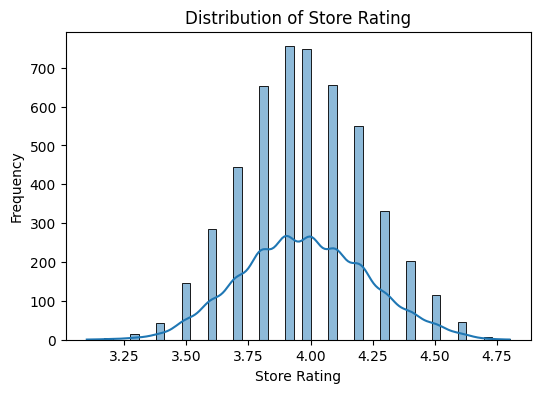

In [18]:
# Descriptive statistics for 'Store Rating'
print(df['Store Rating'].describe())

# Skewness of 'Store Rating'
skewness_store_rating = df['Store Rating'].skew()
print(f"Skewness of Store Rating: {skewness_store_rating}")

# Histogram and KDE plot for 'Store Rating'
plt.figure(figsize=(6, 4))
sns.histplot(df['Store Rating'], kde=True)
plt.title('Distribution of Store Rating')
plt.xlabel('Store Rating')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

This distribution suggests that most customers have a positive perception of the stores, with a small proportion giving slightly higher ratings. This is a good sign for the business, as it indicates overall customer satisfaction.

### **Univariate analysis of Loyalty Score**


count    5000.000000
mean       15.638160
std         9.145189
min         0.000000
25%         7.900000
50%        14.000000
75%        23.500000
max        39.200000
Name: Loyalty Score, dtype: float64
Skewness of Loyalty Score: 0.3302856175669518


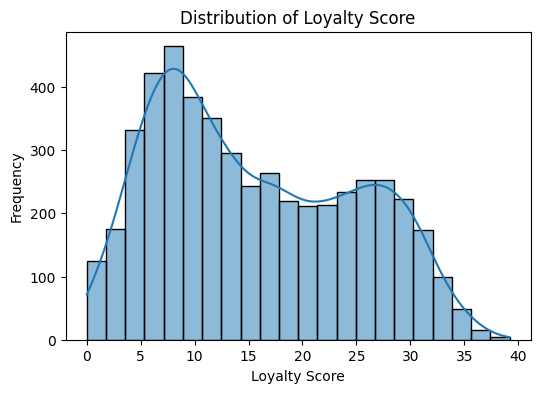

In [19]:
# Descriptive statistics for 'Loyalty Score'
print(df['Loyalty Score'].describe())

# Skewness of 'Loyalty Score'
skewness_loyalty_score = df['Loyalty Score'].skew()
print(f"Skewness of Loyalty Score: {skewness_loyalty_score}")

# Histogram and KDE plot for 'Loyalty Score'
plt.figure(figsize=(6, 4))
sns.histplot(df['Loyalty Score'], kde=True)
plt.title('Distribution of Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

This distribution suggests that a majority of the customers have lower loyalty scores, while a smaller portion has significantly higher loyalty scores. This pattern is often seen in scenarios where there are a few highly loyal customers who stand out from the rest.

**Key Observations:**

* Mean: The average loyalty score is 15.64.
* Standard Deviation: The scores are spread out by an average of 9.14 units from the mean.
* Range: The scores range from 0 to 39.24.
* Skewness: The skewness of 0.33 indicates a moderate positive skew, as mentioned earlier.

### **Univariate analysis of Membership Status**

count    4994.000000
mean        0.308370
std         0.461867
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Membership Status, dtype: float64

Frequency Distribution of Membership Status:
 Membership Status
0.0    3454
1.0    1540
Name: count, dtype: int64


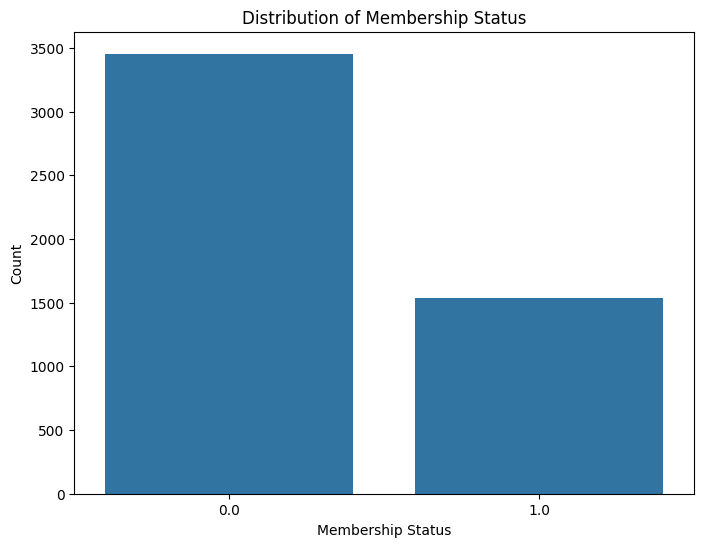

In [20]:
# Descriptive statistics for 'Membership Status'
print(df['Membership Status'].describe())

# Frequency distribution of 'Membership Status'
membership_counts = df['Membership Status'].value_counts()
print("\nFrequency Distribution of Membership Status:\n", membership_counts)

# Bar plot for 'Membership Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Membership Status', data=df)
plt.title('Distribution of Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Count')
plt.show()


**Interpretation:**

* This distribution indicates that a majority of the individuals in the dataset are not members of the program or service represented by the "Membership Status" variable.
* A smaller proportion, approximately 30.8%, are active members.

### **Univariate Analysis of Gender**


Frequency Distribution of Gender:
 Gender
Male      2446
Female    2371
Other      181
Name: count, dtype: int64


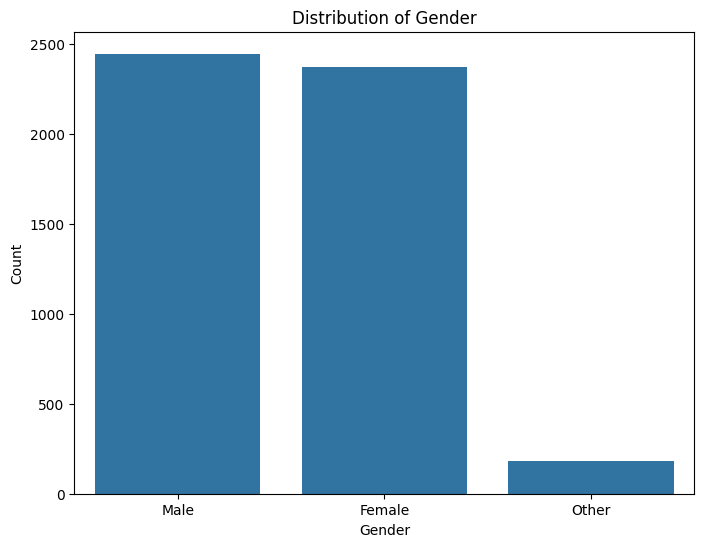

In [21]:
# Frequency distribution of 'Gender'
gender_counts = df['Gender'].value_counts()
print("\nFrequency Distribution of Gender:\n", gender_counts)

# Bar plot for 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Interpretation:**

* The dataset is dominated by males and females, with a significantly smaller number of individuals identifying as "Other."
* The distribution is relatively balanced between males and females.

### **Univariate Analysis of Region**


Frequency Distribution of Region:
 Region
South    1310
West     1281
East     1208
North    1201
Name: count, dtype: int64


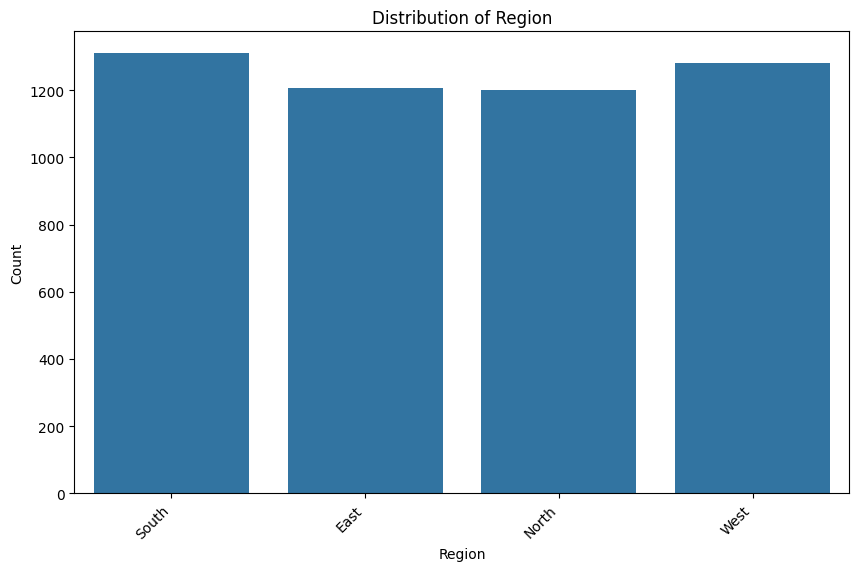

In [22]:
# Frequency distribution of 'Region'
region_counts = df['Region'].value_counts()
print("\nFrequency Distribution of Region:\n", region_counts)

# Bar plot for 'Region'
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution appears to be relatively balanced across the four regions.
* Dominant Region: The South region has the highest number of observations, followed by West, East, and North.

### **Univariate Analysis of Product Category**


Frequency Distribution of Product Category:
 Product Category
Accessories    1015
Laptop         1013
Tablet          997
Television      991
Mobile          984
Name: count, dtype: int64


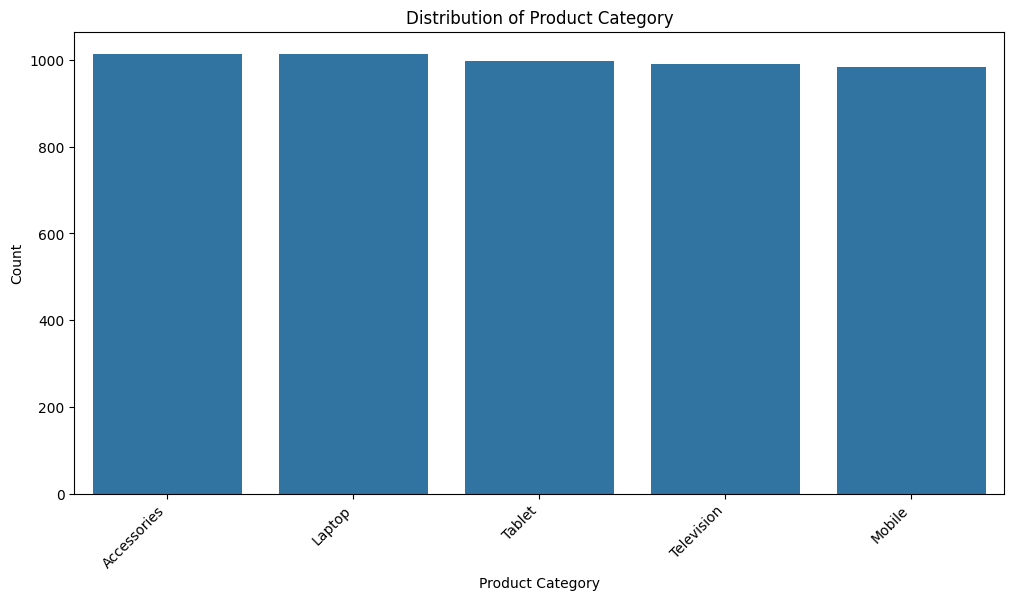

In [23]:
# Frequency distribution of 'Product Category'
product_category_counts = df['Product Category'].value_counts()
print("\nFrequency Distribution of Product Category:\n", product_category_counts)


# Bar plot for 'Product Category'
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', data=df)
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution is relatively balanced across the five product categories.
* Dominant Category: Accessories and Laptops have slightly higher frequencies compared to the other categories.

### **Univariate Analysis of Payment Method**


Frequency Distribution of Payment Method:
 Payment Method
Net Banking    1038
Cash           1015
Credit Card    1011
Debit Card      980
UPI             952
Name: count, dtype: int64


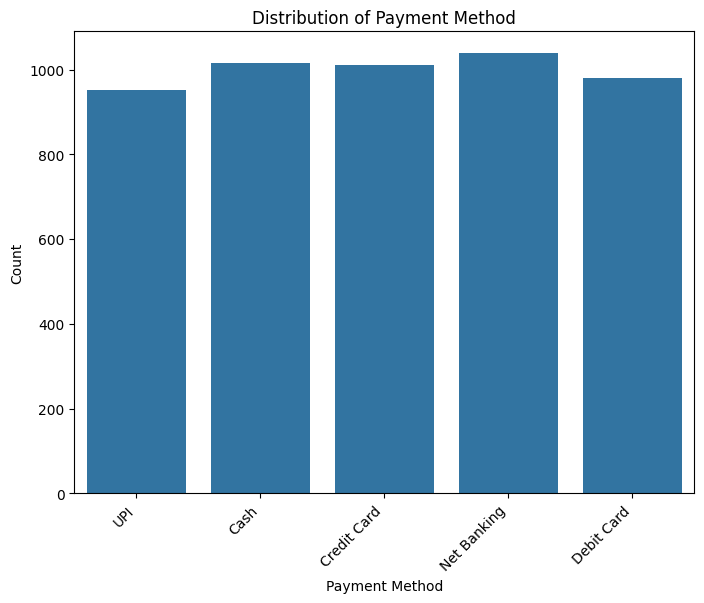

In [24]:
# Frequency distribution of 'Payment Method'
payment_method_counts = df['Payment Method'].value_counts()
print("\nFrequency Distribution of Payment Method:\n", payment_method_counts)

# Bar plot for 'Payment Method'
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', data=df)
plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution is relatively balanced across the five payment methods.
* Dominant Payment Method: Net Banking is the most frequently used payment method.

### **Univariate analysis of Preferred Visit Time**


Frequency Distribution of Preferred Visit Time:
 Preferred Visit Time
Morning      1672
Evening      1660
Afternoon    1660
Name: count, dtype: int64


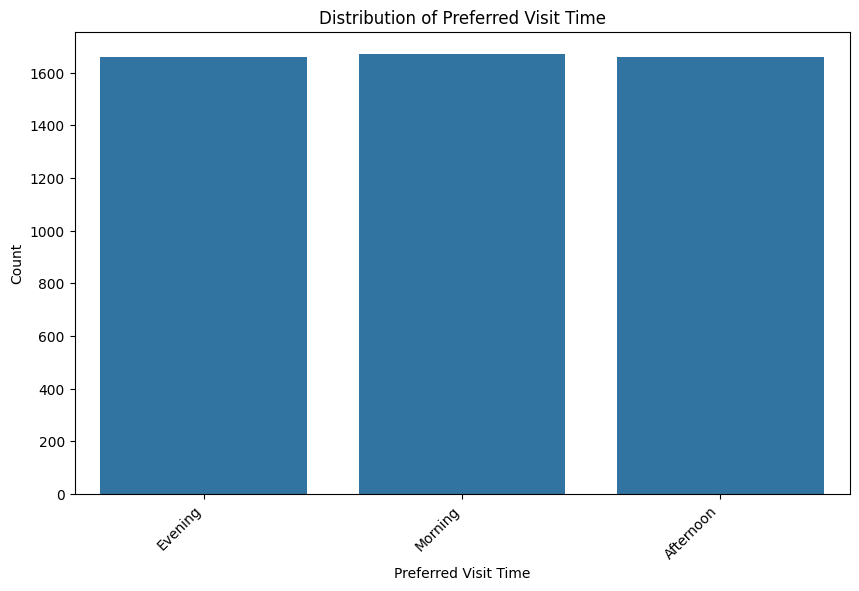

In [25]:
# Frequency distribution of 'Preferred Visit Time'
preferred_visit_time_counts = df['Preferred Visit Time'].value_counts()
print("\nFrequency Distribution of Preferred Visit Time:\n", preferred_visit_time_counts)

# Bar plot for 'Preferred Visit Time'
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Visit Time', data=df)
plt.title('Distribution of Preferred Visit Time')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution is relatively balanced across the three time slots.
* Dominant Time Slot: Morning is slightly more preferred than Evening and Afternoon.

## **Bivariate Analysis**

### **Scatter plots**

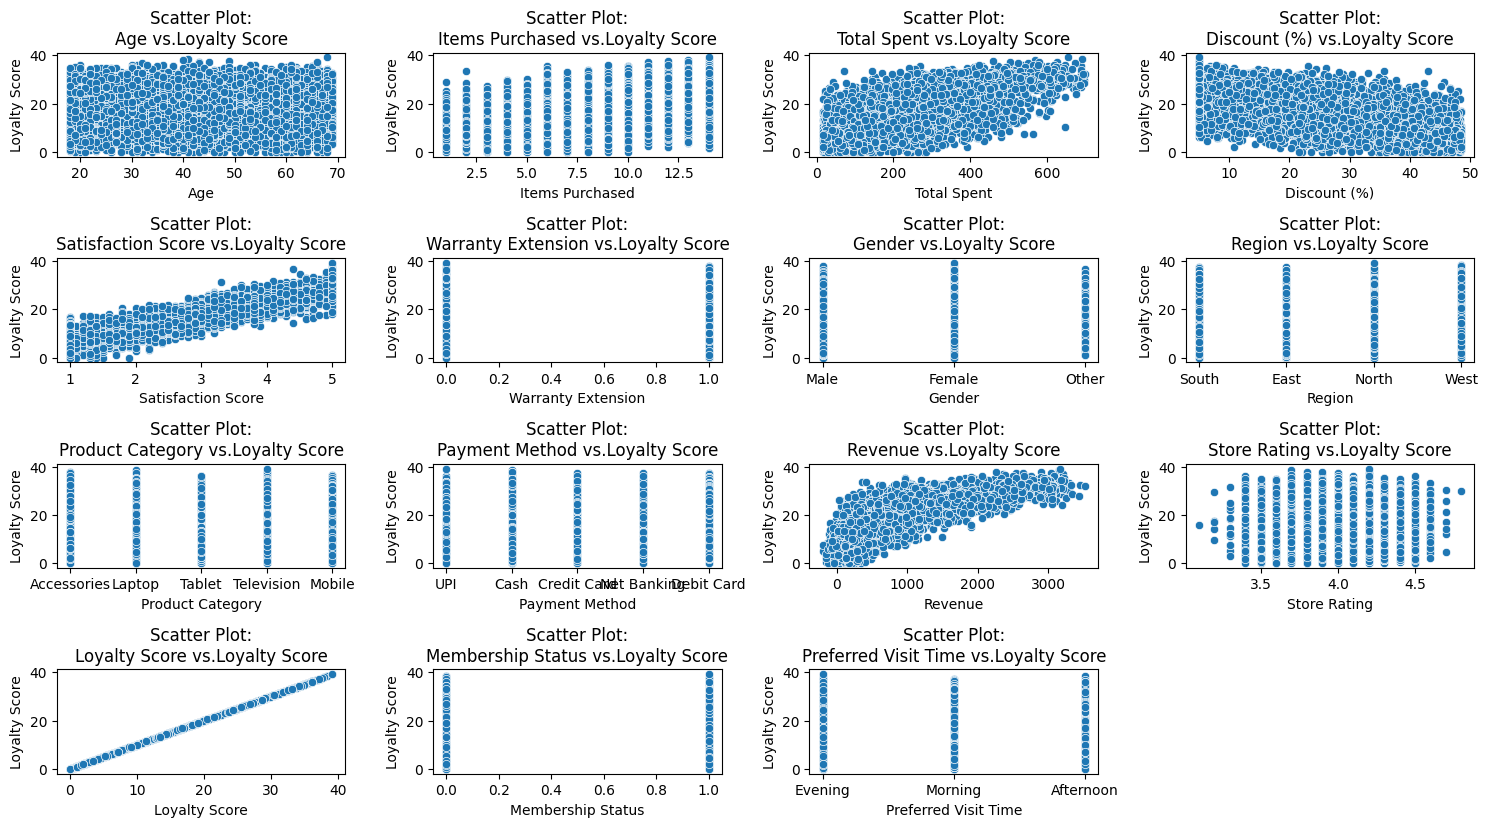

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):

    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='Loyalty Score')
    plt.title(f'Scatter Plot:\n{col} vs.Loyalty Score')
    plt.xlabel(col)
plt.tight_layout()
plt.show()
plt.show()

### **Age vs. Loyalty Score**

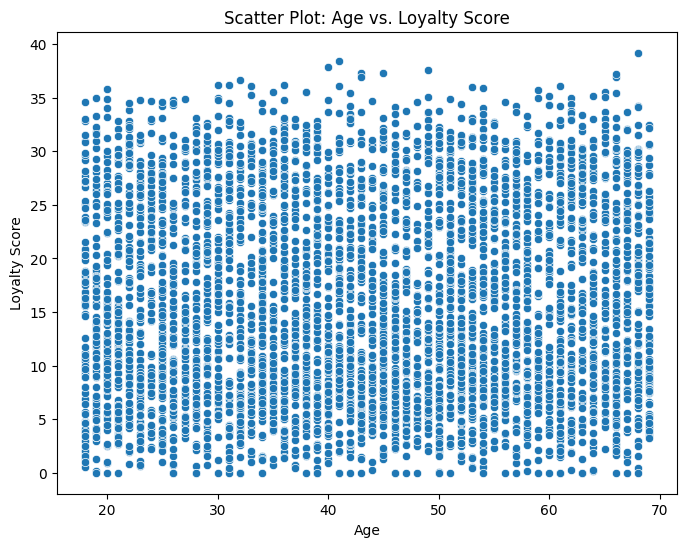

Correlation between Age and Loyalty Score: 0.009298040202737909


In [27]:
# Bivariate Analysis: Age vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Age vs. Loyalty Score')
plt.xlabel('Age')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Age and Loyalty Score
correlation = df['Age'].corr(df['Loyalty Score'])
print(f"Correlation between Age and Loyalty Score: {correlation}")

* The scatter plot shows **no clear relationship**  between Age and Loyalty Score.
* There's no distinct pattern, and loyalty scores are spread across all age groups.
* Age likely isn't a strong predictor of loyalty

### **Items Purchased vs. Loyalty Score**



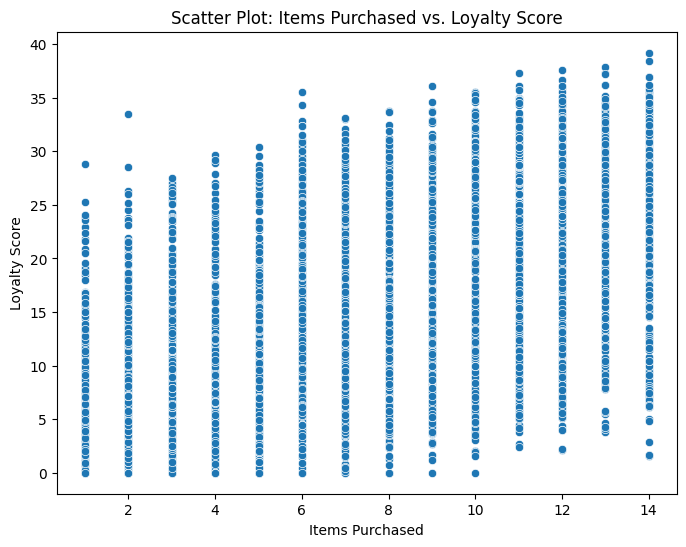

Correlation between Items Purchased and Loyalty Score: 0.5577994699135455


In [28]:
# Bivariate Analysis: Items Purchased vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Items Purchased', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Items Purchased vs. Loyalty Score')
plt.xlabel('Items Purchased')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Items Purchased and Loyalty Score
correlation = df['Items Purchased'].corr(df['Loyalty Score'])
print(f"Correlation between Items Purchased and Loyalty Score: {correlation}")

* The scatter plot shows a **weak positive correlation** between items purchased and loyalty score.
* As customers buy more, their loyalty tends to increase.
* However, the vertical clusters suggest other factors influence loyalty beyond purchase volume.

### **Total Spent vs. Loyalty Score**

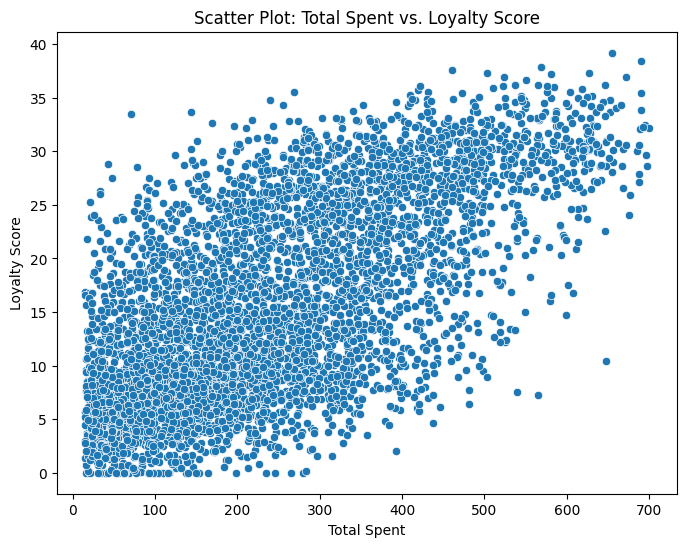

Correlation between Total Spent and Loyalty Score: 0.6697635244346728


In [29]:
# Bivariate Analysis: Total Spent vs. Loyalty ScoreTotal Spent vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Spent', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Total Spent vs. Loyalty Score')
plt.xlabel('Total Spent')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Total Spent and Loyalty Score
correlation = df['Total Spent'].corr(df['Loyalty Score'])
print(f"Correlation between Total Spent and Loyalty Score: {correlation}")


**Interpretation:**


* The scatter plot illustrates a positive correlation
* This analysis suggests that customer spending is a significant factor influencing their loyalty.
* The business may want to focus on strategies to encourage higher spending among customers to boost their loyalty.
* It's also important to identify and reward high-spending, high-loyalty customers to retain their business.

### **Discount (%) vs. Loyalty Score**

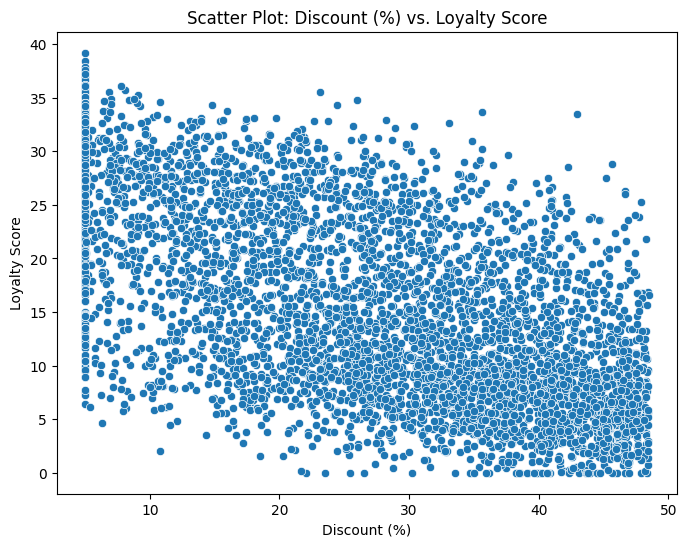

Correlation between Discount (%) and Loyalty Score: -0.6592444841450275


In [30]:
# Bivariate Analysis: Discount (%) vs. Loyalty ScoreDiscount (%) vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount (%)', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Discount (%) vs. Loyalty Score')
plt.xlabel('Discount (%)')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Discount (%) and Loyalty Score
correlation = df['Discount (%)'].corr(df['Loyalty Score'])
print(f"Correlation between Discount (%) and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot illustrates a **negative correlation** between "Discount (%)" and "Loyalty Score."
* Higher discounts tend to be associated with lower loyalty scores.
* Customers who are highly loyal may not need significant discounts to make purchases.

### **Satisfaction Score vs. Loyalty Score**


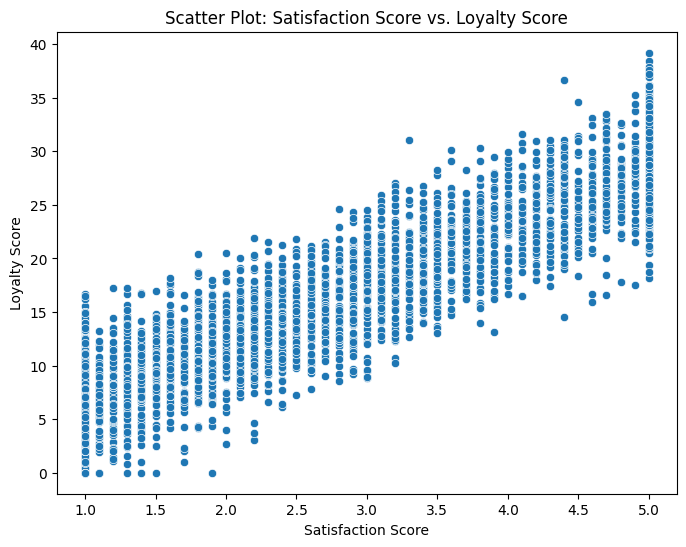

Correlation between Satisfaction Score and Loyalty Score: 0.9350893307214098


In [31]:
# Bivariate Analysis: Satisfaction Score vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Satisfaction Score', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Satisfaction Score vs. Loyalty Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Satisfaction Score and Loyalty Score
correlation = df['Satisfaction Score'].corr(df['Loyalty Score'])
print(f"Correlation between Satisfaction Score and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot illustrates a **strong positive correlation** between "Satisfaction Score" and "Loyalty Score."
* Customer satisfaction is a key driver of loyalty.
*  The business should prioritize strategies to improve customer satisfaction, which will likely lead to increased loyalty.

### **Warranty Extension vs. Loyalty Score**

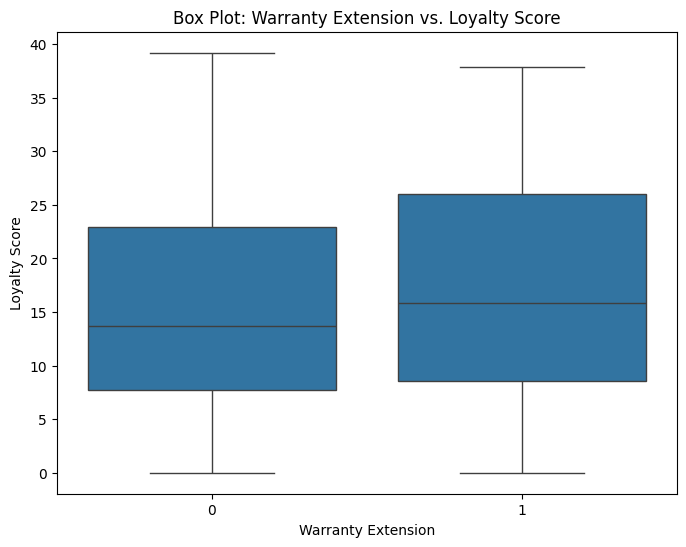

Correlation between Warranty Extension and Loyalty Score: 0.07600928879883181


In [32]:
# Bivariate Analysis: Warranty Extension vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.boxplot(x='Warranty Extension', y='Loyalty Score', data=df)
plt.title('Box Plot: Warranty Extension vs. Loyalty Score')
plt.xlabel('Warranty Extension')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Warranty Extension and Loyalty Score
correlation = df['Warranty Extension'].corr(df['Loyalty Score'])
print(f"Correlation between Warranty Extension and Loyalty Score: {correlation}")

**Interpretation:**

* While there seems to be a slight tendency for customers with warranty extensions to have higher loyalty scores, the **relationship is not strong.**
*  Other factors likely have a more significant impact on customer loyalty.

### **Revenue vs. Loyalty Score**


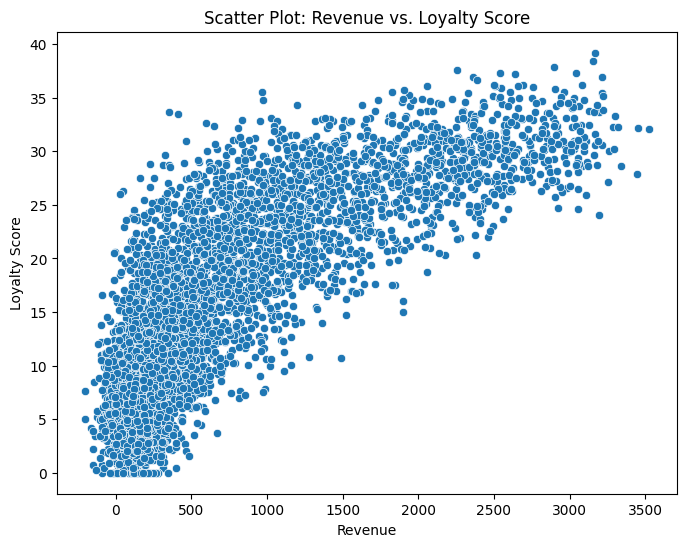

Correlation between Revenue and Loyalty Score: 0.8085308703315363


In [33]:
# Bivariate Analysis: Revenue vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Revenue', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Revenue vs. Loyalty Score')
plt.xlabel('Revenue')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Revenue and Loyalty Score
correlation = df['Revenue'].corr(df['Loyalty Score'])
print(f"Correlation between Revenue and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot shows a **moderate positive relationship** between revenue and loyalty score.
* This means that as the revenue increases, the loyalty score tends to increase, and vice versa.
* However, there is still a considerable amount of variability in loyalty scores for each level of revenue, indicating that revenue alone does not fully explain the variation in loyalty scores.

### **Store Rating vs. Loyalty Score**

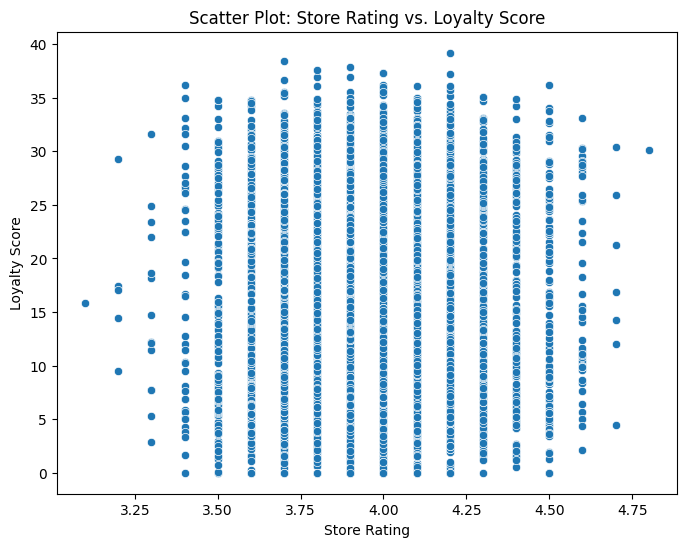

Correlation between Store Rating and Loyalty Score: 0.005959223782810566


In [34]:
# Bivariate Analysis: Store Rating vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Store Rating', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Store Rating vs. Loyalty Score')
plt.xlabel('Store Rating')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Store Rating and Loyalty Score
correlation = df['Store Rating'].corr(df['Loyalty Score'])
print(f"Correlation between Store Rating and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot illustrates a **very weak positive correlation** between "Store Rating" and "Loyalty Score."
* Store rating seems to have minimal impact on customer loyalty.
* Other factors likely have a more significant influence on customer loyalty.

### **Membership Status vs. Loyalty Score**

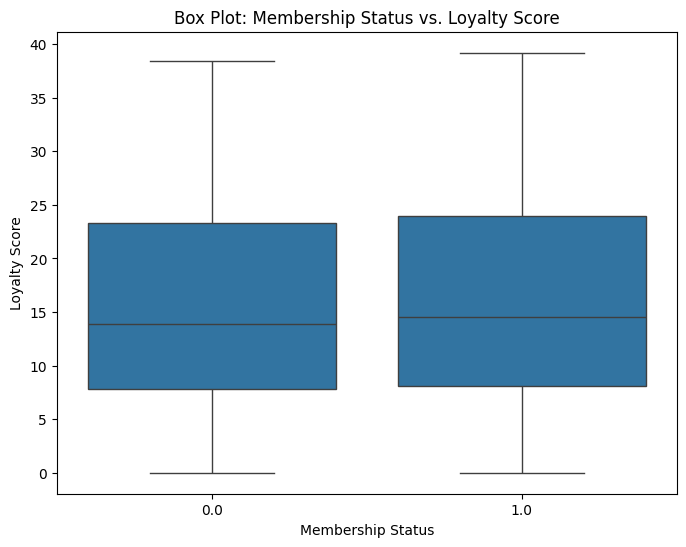


Average Loyalty Score by Membership Status:
 Membership Status
0.0    15.513781
1.0    15.913896
Name: Loyalty Score, dtype: float64


In [35]:
# Bivariate analysis of  Membership Status vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.boxplot(x='Membership Status', y='Loyalty Score', data=df)
plt.title('Box Plot: Membership Status vs. Loyalty Score')
plt.xlabel('Membership Status')
plt.ylabel('Loyalty Score')
plt.show()

# You can also calculate the average loyalty score for each membership status group:
average_loyalty_by_membership = df.groupby('Membership Status')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Membership Status:\n", average_loyalty_by_membership)


**Interpretation:**
* The box plot shows a slight difference in loyalty scores between members and non-members.
* However, the difference is not very significant, and the range and variability of loyalty scores are similar for both groups.
* This suggests that membership status may not be a strong predictor of loyalty score.

### **Gender vs. Loyalty Score**

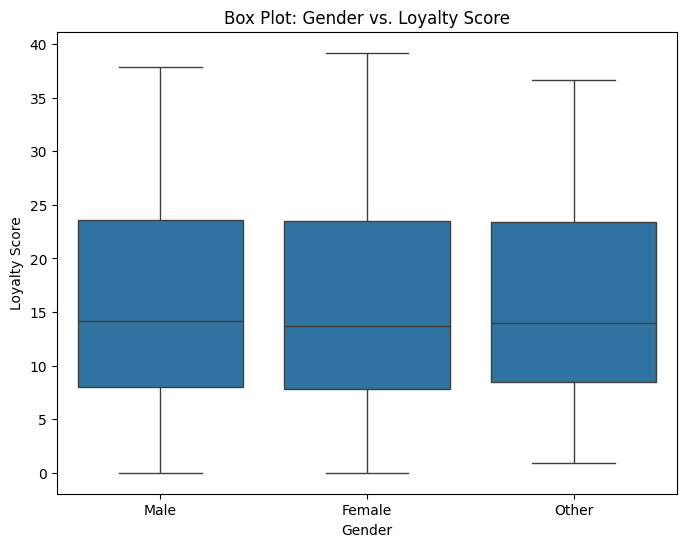


Average Loyalty Score by Gender:
 Gender
Female    15.509532
Male      15.741783
Other     15.919337
Name: Loyalty Score, dtype: float64


In [36]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Loyalty Score', data=df)
plt.title('Box Plot: Gender vs. Loyalty Score')
plt.xlabel('Gender')
plt.ylabel('Loyalty Score')
plt.show()

# average loyalty score for each gender group:
average_loyalty_by_gender = df.groupby('Gender')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Gender:\n", average_loyalty_by_gender)

**Interpretation:**

* There is a **very weak correlation** between gender and loyalt
* Other factors likely have a more significant impact on customer loyalty.

### **Region vs. Loyalty Score**

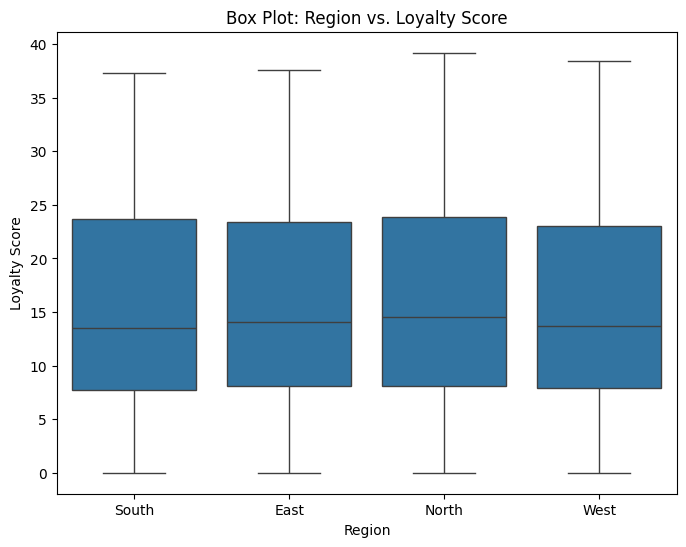


Average Loyalty Score by Region:
 Region
East     15.725497
North    15.909908
South    15.462366
West     15.480796
Name: Loyalty Score, dtype: float64


In [37]:
# Bivariate analysis of 'Region' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Loyalty Score', data=df)
plt.title('Box Plot: Region vs. Loyalty Score')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.show()

#  average loyalty score for each region group:
average_loyalty_by_region = df.groupby('Region')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Region:\n", average_loyalty_by_region)


**Interpretation:**

* There is a **very weak correlation** between region and loyalty.
* The business should focus on other factors that drive customer loyalty, such as product quality, customer service, and personalized experiences.

### **Product Category vs. Loyalty Score**

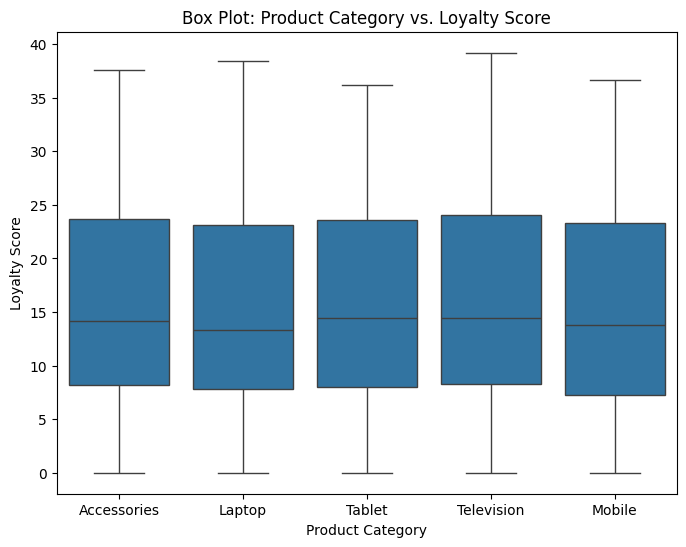


Average Loyalty Score by Product Category:
 Product Category
Accessories    15.811330
Laptop         15.271964
Mobile         15.357419
Tablet         15.786760
Television     15.964379
Name: Loyalty Score, dtype: float64


In [38]:
# Bivariate analysis of 'Product Category' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Product Category', y='Loyalty Score', data=df)
plt.title('Box Plot: Product Category vs. Loyalty Score')
plt.xlabel('Product Category')
plt.ylabel('Loyalty Score')
plt.show()

# average loyalty score for each product category group:
average_loyalty_by_product_category = df.groupby('Product Category')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Product Category:\n", average_loyalty_by_product_category)


**Interpretation:**

* While there seems to be a slight tendency for the "Television" category to have higher loyalty scores, the **relationship is not strong**.
* Other factors likely have a more significant impact on customer loyalty.

### **Payment Method vs. Loyalty Score**

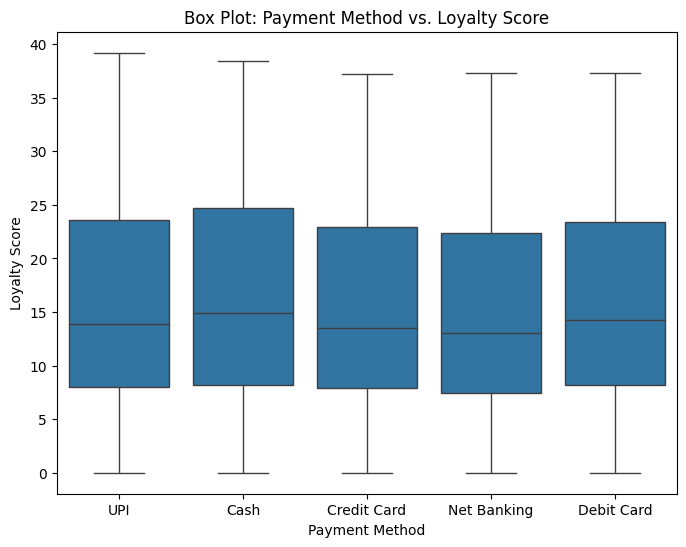


Average Loyalty Score by Payment Method:
 Payment Method
Cash           16.263251
Credit Card    15.288922
Debit Card     15.968980
Net Banking    15.089499
UPI            15.573424
Name: Loyalty Score, dtype: float64


In [39]:
# Bivariate analysis of 'Payment Method' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Payment Method', y='Loyalty Score', data=df)
plt.title('Box Plot: Payment Method vs. Loyalty Score')
plt.xlabel('Payment Method')
plt.ylabel('Loyalty Score')
plt.show()

# You can also calculate the average loyalty score for each payment method group:
average_loyalty_by_payment_method = df.groupby('Payment Method')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Payment Method:\n", average_loyalty_by_payment_method)

**Interpretation:**

* While there seems to be a slight tendency for the "Cash" payment method to have higher loyalty scores, the **relationship is not strong**
* Other factors likely have a more significant impact on customer loyalty.

### **Referred Visit Time vs. Loyalty Score**

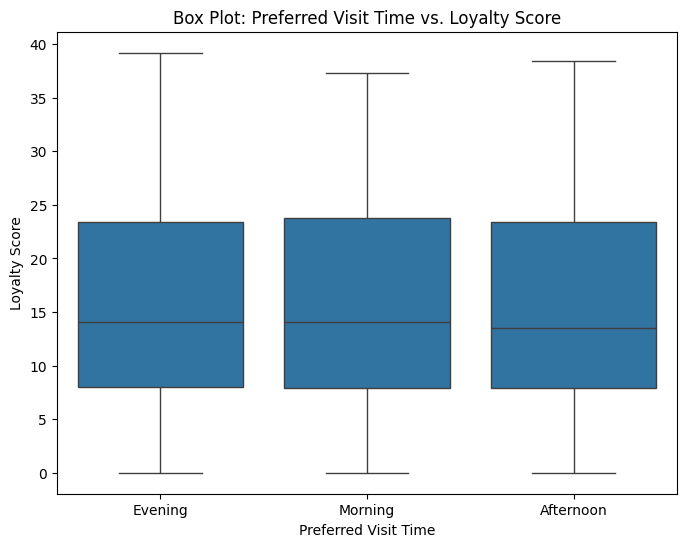


Average Loyalty Score by Preferred Visit Time:
 Preferred Visit Time
Afternoon    15.445904
Evening      15.664518
Morning      15.795215
Name: Loyalty Score, dtype: float64


In [40]:
# Bivariate analysis of 'Preferred Visit Time' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Preferred Visit Time', y='Loyalty Score', data=df)
plt.title('Box Plot: Preferred Visit Time vs. Loyalty Score')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Loyalty Score')
plt.show()

# You can also calculate the average loyalty score for each preferred visit time group:
average_loyalty_by_visit_time = df.groupby('Preferred Visit Time')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Preferred Visit Time:\n", average_loyalty_by_visit_time)


**Interpretation:**

* There is a **very weak correlation** between preferred visit time and loyalty
* Other factors likely have a more significant impact on customer loyalty.

## **Multivariate Analysis**

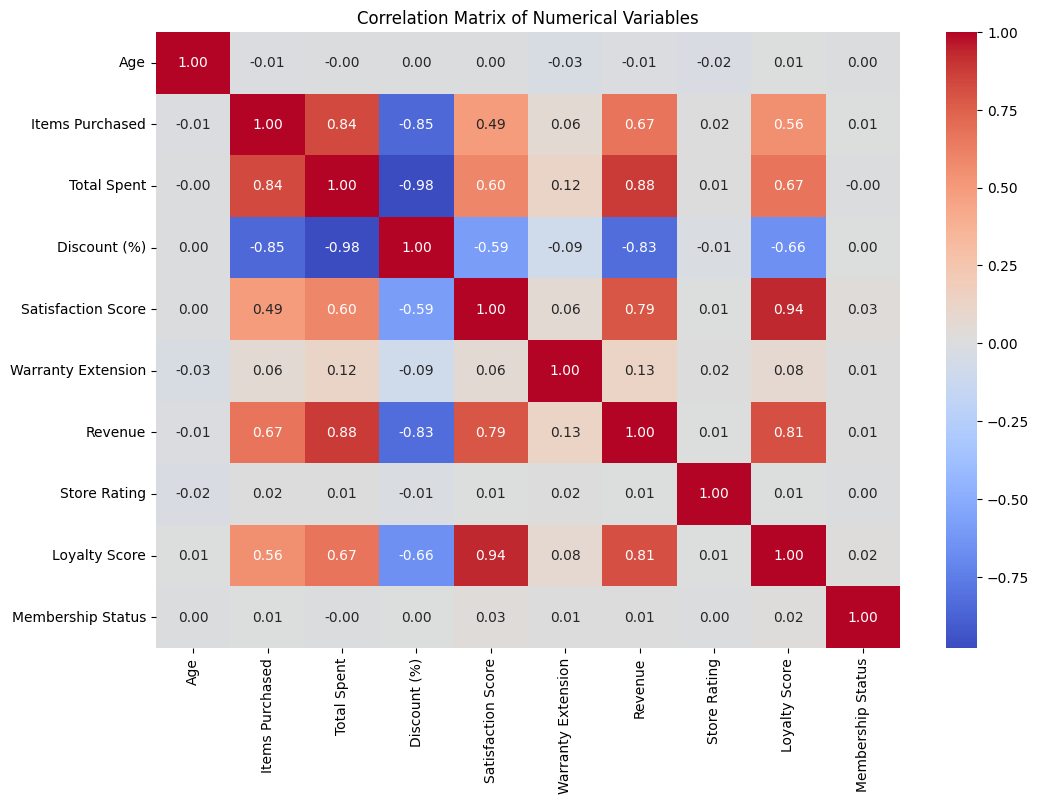

In [41]:
# numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])  # Selects columns with numerical data types

# correlation matrix using the numerical DataFrame
correlation_matrix = numerical_df.corr()

# Heatmap of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Strong Positive Correlation between:**

* Items Purchased and Total Spent
* Satisfaction Score and Loyalty Score
* Revenue and Total Spent
* Revenue and Loyalty Score

**Strong Negative Correlations:**

* Discount (%) and Total Spent
* Discount (%) and Revenue
* Total Spent and Revenue

**Other Observations:**

Age and Warranty Extension has a relatively weak correlation with other variables, indicating that they might not be a strong driver of customer behavior.



## **4. Data Cleaning**

###**Missing value handling: Mode/ median imputation**

In [42]:
# Handling missing values
# mode imputation for categorical features

for col in ['Gender', 'Payment Method', 'Membership Status', 'Preferred Visit Time']:

   df[col] = df[col].fillna(df[col].mode()[0])

# median imputation

df['Store Rating'] = df['Store Rating'].fillna(df['Store Rating'].median())

df.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


### **Outlier Treatment: IQR function**

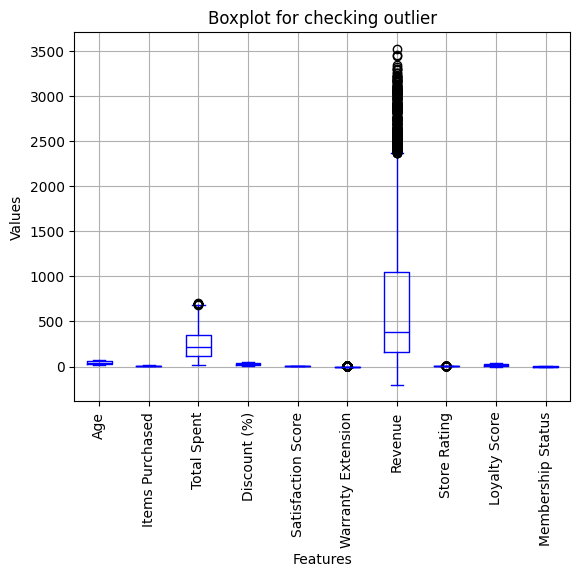

In [43]:
# Outlier checking using boxplot

df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [44]:
df.skew(numeric_only=True)

,0
Age,-0.012230
Items Purchased,-0.018387
Total Spent,0.597528
Discount (%),-0.179842
Satisfaction Score,0.350855
Warranty Extension,1.349447
Revenue,1.394284
Store Rating,0.067114
Loyalty Score,0.330286
Membership Status,0.832019


* **Outliers:**  Prominent outliers in "Total Spent" and "Revenue" suggest unusual customer behavior or high-value transactions.
* **Distribution:** Most features are right-skewed, indicating a majority of customers make smaller purchases.

In [45]:
# Outlier treatment in  revenue and total spent using iqr function

def treat_outliers_iqr(df, column):


  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  return df


# Treat outliers in 'Revenue' and 'Total Spent'
df = treat_outliers_iqr(df, 'Revenue')
df = treat_outliers_iqr(df, 'Total Spent')

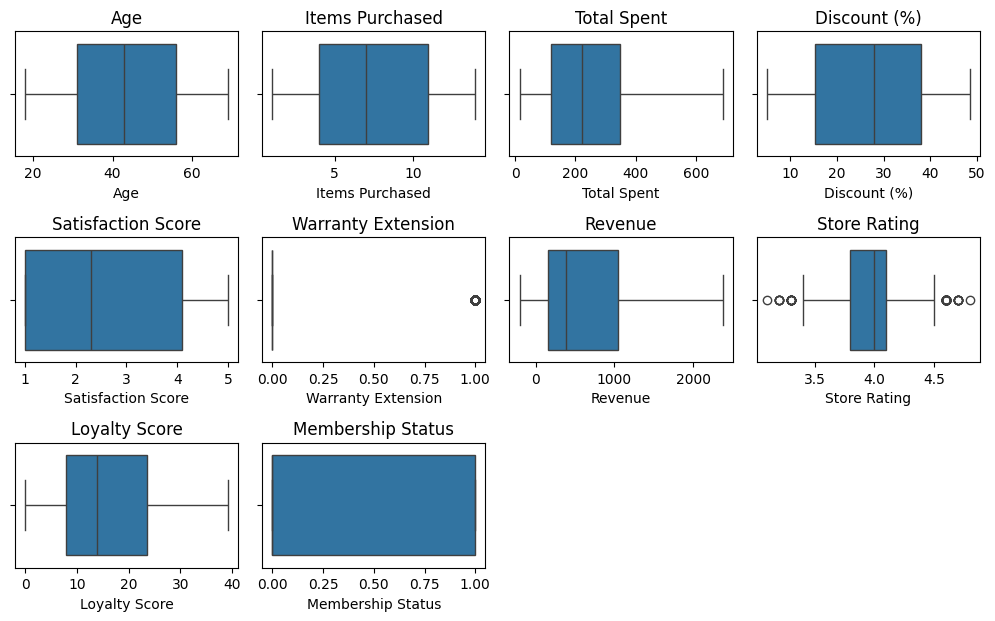

In [46]:
# boxplot after outlier treatment
numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

**Observations:**

* **Reduced Outliers**: The outliers observed in "Total Spent" and "Revenue" before treatment are now significantly mitigated.
* **Distributio**n: The overall distribution of most features remains similar, with some slight changes due to outlier removal.

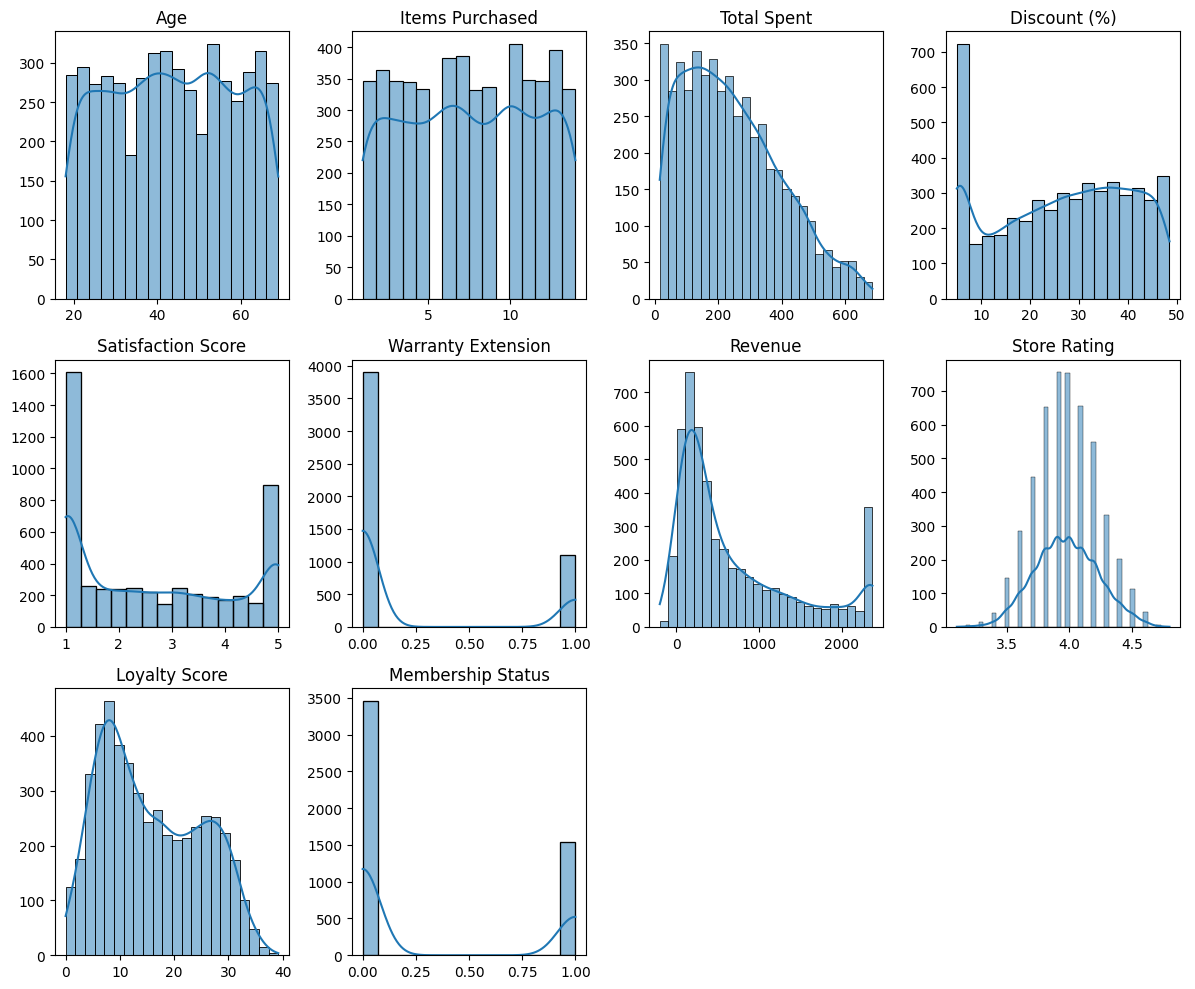

In [47]:
# hist plot of variables to check for change in symmetry after outlier treatment

numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### **Feature Creation**

In [48]:
# Average Spent per purchase
df['Avg Spent'] = df['Total Spent'] / df['Items Purchased']

# Age Loyalty Interaction (multiply age and loyalty score)
df['AgeLoyaltyInteraction'] = df['Age'] * df['Loyalty Score']


In [49]:
# dropping original fetures such as total spent, items purchased and age as they cause data redundancy

df = df.drop(['Total Spent', 'Items Purchased', 'Age'], axis=1)

**1. Avg Spent:**

* This column calculates the average amount spent per purchase for each customer.
* It provides insights into their spending habits and helps identify high-value customers.



**2. AgeLoyaltyInteraction:**

* This column creates a new feature by multiplying a customer's age with their loyalty score.
* It captures the potential synergy between age and loyalty, which might be relevant for targeted marketing campaigns or customer segmentation

### **Robust Scaler**

In [50]:
from sklearn.preprocessing import RobustScaler

features_to_scale = ['Avg Spent','AgeLoyaltyInteraction', 'Discount (%)', 'Satisfaction Score', 'Revenue', 'Store Rating']

# Creates a RobustScaler object
scaler = RobustScaler()

# Fit and transform the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df[features_to_scale].head())

   Avg Spent  AgeLoyaltyInteraction  Discount (%)  Satisfaction Score  \
0  -0.172020              -0.559340      0.846922           -0.419355   
1   0.571703               1.865080     -0.874848            0.483871   
2  -0.014441              -0.374429      0.413011           -0.161290   
3   0.827560              -0.495450     -0.864190           -0.129032   
4   0.848381               1.849414     -1.006353            0.516129   

    Revenue  Store Rating  
0 -0.262024     -1.000000  
1  1.251772     -1.333333  
2 -0.334189     -0.333333  
3  0.502499     -0.333333  
4  2.255473     -0.666667  


* While dealing with our datasets containing genuine outliers, standard scaling techniques like Min-Max Scaler or Standard Scaler can be less effective.
* To address this issue, we employed Robust Scaler.
* This technique is specifically designed to handle outliers by using robust statistical measures: the median and the interquartile range (IQR).

## **5. Feature Engineering**

### **Encoding: One hot encoder**

In [51]:
# prompt: initialize one hot encoder with drop =first to avoid dummy variable trap of categorical features

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object with drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Select categorical features to encode
categorical_features = ['Gender', 'Payment Method', 'Membership Status', 'Preferred Visit Time', 'Region', 'Product Category']

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical features
df = df.drop(categorical_features, axis=1)

# Print the updated DataFrame
print(df.head())

   Discount (%)  Satisfaction Score  Warranty Extension   Revenue  \
0      0.846922           -0.419355                   1 -0.262024   
1     -0.874848            0.483871                   1  1.251772   
2      0.413011           -0.161290                   1 -0.334189   
3     -0.864190           -0.129032                   0  0.502499   
4     -1.006353            0.516129                   0  2.255473   

   Store Rating  Loyalty Score  Avg Spent  AgeLoyaltyInteraction  Gender_Male  \
0     -1.000000            3.6  -0.172020              -0.559340          1.0   
1     -1.333333           25.8   0.571703               1.865080          0.0   
2     -0.333333            7.0  -0.014441              -0.374429          1.0   
3     -0.333333            7.6   0.827560              -0.495450          0.0   
4     -0.666667           29.5   0.848381               1.849414          0.0   

   Gender_Other  ...  Membership Status_1.0  Preferred Visit Time_Evening  \
0           0.0  ... 


* One-hot encoding is a more robust and reliable technique for handling categorical data in machine learning.
* By avoiding the dummy variable trap, it ensures that the model can accurately learn from the data and make accurate predictions modify

## **6. Feature Selection**

### **Feature importance analysis:**

1.   mutual info regression
2.   random forest regression





### **using Mutual info Regression**

In [52]:
# feature importance analysis using mutual info regression
dfr=df.copy()

from sklearn.feature_selection import mutual_info_regression

X = dfr.drop('Loyalty Score', axis=1)
y = dfr['Loyalty Score']

def feature_importance_mutual_info(X, y):

  mi_scores = mutual_info_regression(X, y)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = feature_importance_mutual_info(X, y)
mi_scores



,MI Scores
AgeLoyaltyInteraction,0.959398
Satisfaction Score,0.904194
Revenue,0.566489
Discount (%),0.292731
Avg Spent,0.077225
Warranty Extension,0.016894
Preferred Visit Time_Evening,0.009716
Gender_Other,0.007842
Product Category_Mobile,0.005444
Region_South,0.001952


**Top 5 Features**:


* AgeLoyaltyInteraction (0.975)
* Satisfaction Score (0.917)
* Revenue (0.564)
* Discount (%) (0.297)
* Avg Spent (0.077)


### **using random forest regressor**

Satisfaction Score              0.858758
AgeLoyaltyInteraction           0.076192
Revenue                         0.020731
Discount (%)                    0.012041
Avg Spent                       0.009906
Store Rating                    0.005564
Preferred Visit Time_Morning    0.001114
Gender_Male                     0.001113
Product Category_Laptop         0.001047
Region_West                     0.001043
Product Category_Television     0.001043
Membership Status_1.0           0.001036
Payment Method_Net Banking      0.001031
Product Category_Tablet         0.001014
Payment Method_UPI              0.001009
Payment Method_Debit Card       0.001006
Preferred Visit Time_Evening    0.000998
Payment Method_Credit Card      0.000993
Warranty Extension              0.000971
Product Category_Mobile         0.000962
Region_North                    0.000938
Region_South                    0.000892
Gender_Other                    0.000601
dtype: float64


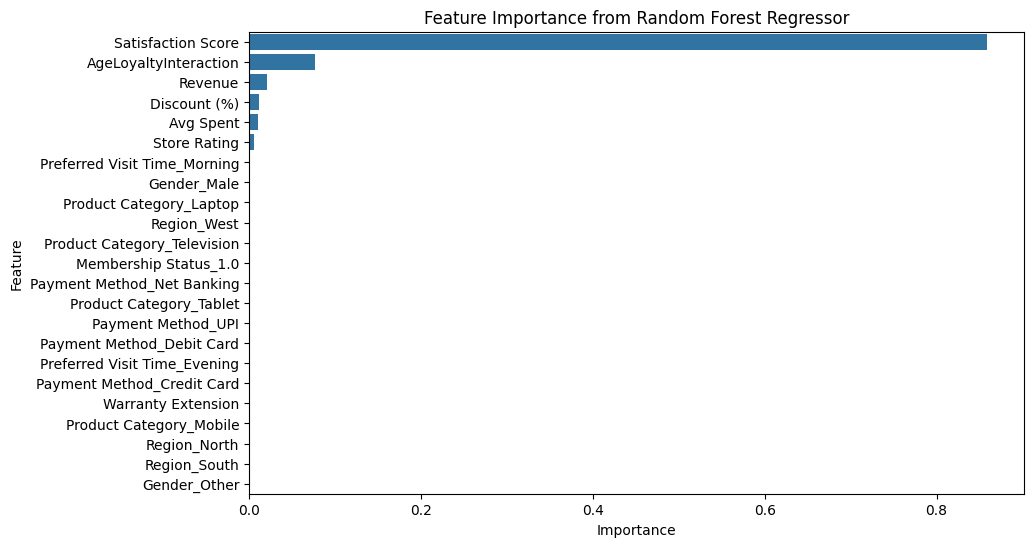

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop('Loyalty Score', axis=1)
y = df['Loyalty Score']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

# ploting feature importances using a bar chart:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Top 5 features** :

Satisfaction Score

AgeLoyaltyInteraction

Revenue

Discount (%)

Avg Spent

**key points**

Based on the feature importance analysis, the top 5 features impacting the model are:

* AgeLoyaltyInteraction

* Satisfaction Score

* Revenue

* Discount (%)

* Avg Spent

## **7. Model Selection and Testing**

In [54]:
selected_features = [
    'AgeLoyaltyInteraction',
    'Satisfaction Score',
    'Revenue',
    'Discount (%)',
    'Avg Spent'
]

X = df[selected_features]
y= df['Loyalty Score']

### **Model 1: Gradient booster**

In [55]:
from re import M
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

selected_features = list(X.keys())
X_data = dfr[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_data, dfr['Loyalty Score'], test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation of the model's performance
mse = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print('mean absolute error:',MAE)
print("R-squared:", r2)

Mean Squared Error: 5.931438142453756
mean absolute error: 1.910227025575298
R-squared: 0.9281742979215155


### **Model 2: Random forest**

In [56]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, df['Loyalty Score'], test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 6.400027262000002
Mean Absolute Error: 1.9541199999999999
R-squared: 0.9225000007798404


### **Model 3: Huber Regressor**

In [57]:
from sklearn.linear_model import HuberRegressor

X_train, X_test, y_train, y_test = train_test_split(X, df['Loyalty Score'], test_size=0.2, random_state=42)

model = HuberRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7.462050687893235
Mean Absolute Error: 2.179856861449065
R-squared: 0.9096396157675435


### **Model 4: Elastic Net Regressor**

In [58]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X, df['Loyalty Score'], test_size=0.2, random_state=42)

# Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8.900472105924834
Mean Absolute Error: 2.3828973076474367
R-squared: 0.8922213057803962


## **Initial Evaluation :**

* Among these 5 models, **Random Forest and Gradient Boosting models** have shown much better performance.
* Fine-tuning their hyperparameters could further enhance the model's accuracy.

## **ModelTuning:**

In [60]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Mean Squared Error: 5.900435599925177
Mean Absolute Error: 1.8919148196182076
R-squared: 0.9285497177319988


### **best-performing model**

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and train the Gradient Boosting Regressor with the best hyperparameters
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 5.900435599925177
Mean Absolute Error: 1.8919148196182076
R-squared: 0.9285497177319988
